In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

# **Import the dataset**

In [4]:
df = pd.read_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# **Summary Statics and Missing value Report**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
#converting time column to datetime data type
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [8]:
#Looking at the data date range
print("Time interval " ,df["Timestamp"].min()  , " to ", df["Timestamp"].max())

Time interval  2021-10-30 00:01:00  to  2022-10-30 00:00:00


Showing how many values missed from each column

In [9]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

We can see there is no missing in all the columns except for the comments

In [10]:
df.drop(columns=["Comments"] , inplace=True) #Let's drop the comments column which dont hold any useful information

Let's view the statical data for this dataset

In [11]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


We can see ths the many columns have outliner we can see how the max value is so far from 75th value

**Outliners**

In [12]:
Z_score_targets = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
#Calculating the Z-scores for the selected columns
Z_scores = df[Z_score_targets].apply(zscore)
#Z-scores greater than 3 or less than -3 are considered outliers
flaged_outliners = (abs(Z_scores) > 3).any(axis = 1)
print("Number of flaged outliers: ", flaged_outliners.sum())

Number of flaged outliers:  16292


**Imputation**

In [14]:
for col in Z_score_targets:
    df.loc[flaged_outliners , col]= df[col].median()
#impute outliers with the median of the column

Save the clean csv

In [15]:
df.to_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/sierraleone_clean.csv", index=False)

# **Time Series Analysis**

In [22]:
df_clean = pd.read_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/benin-sierraleone_clean.csv").set_index("Timestamp")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/benin-sierraleone_clean.csv'

In [23]:
columns_to_plot = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

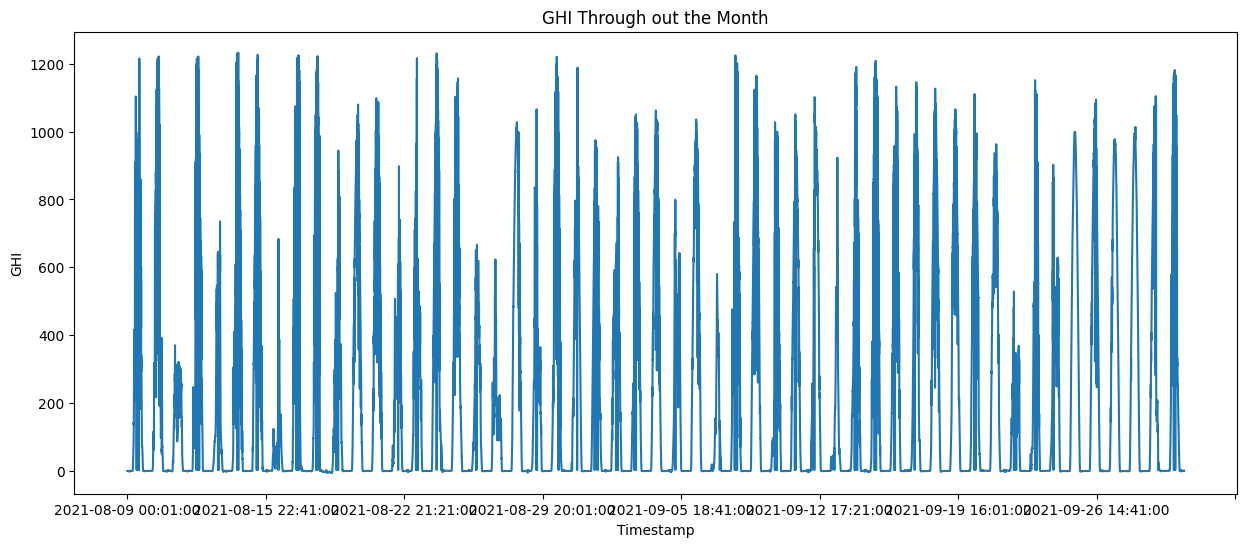

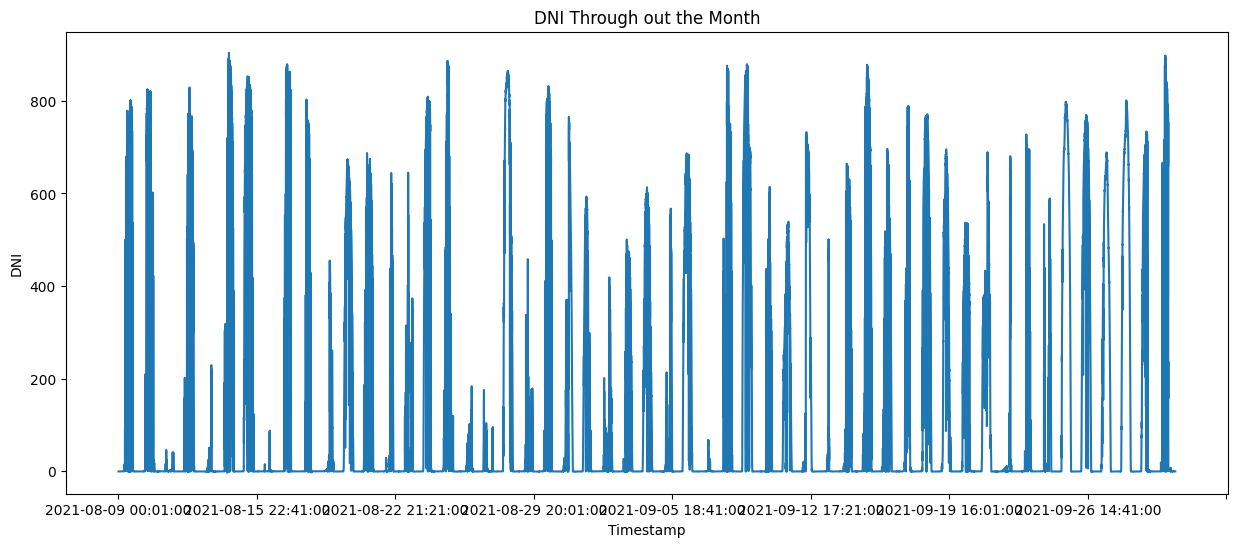

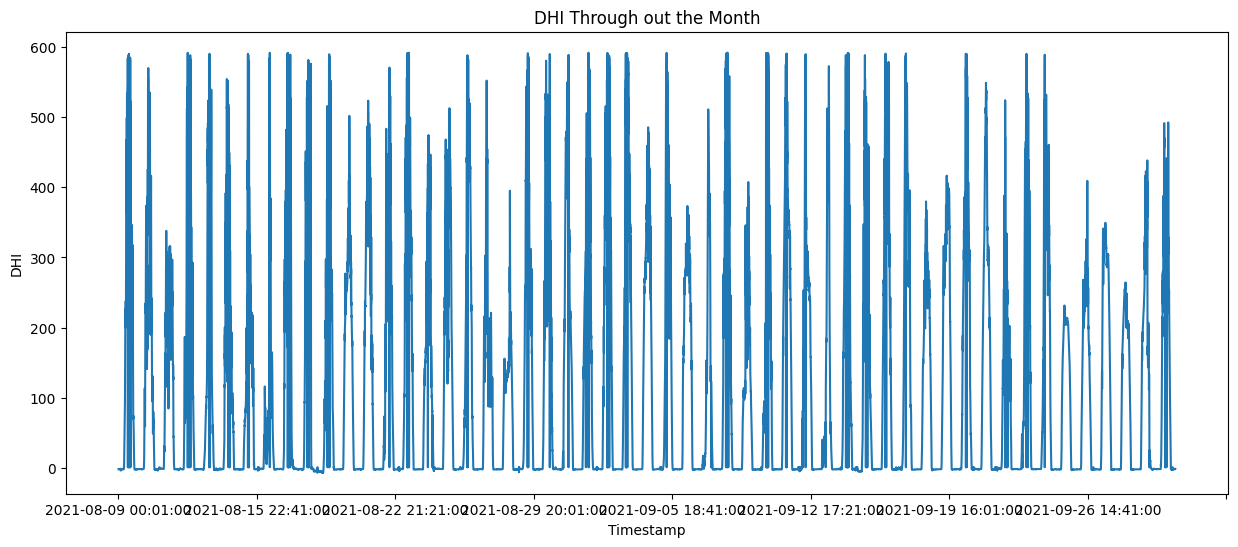

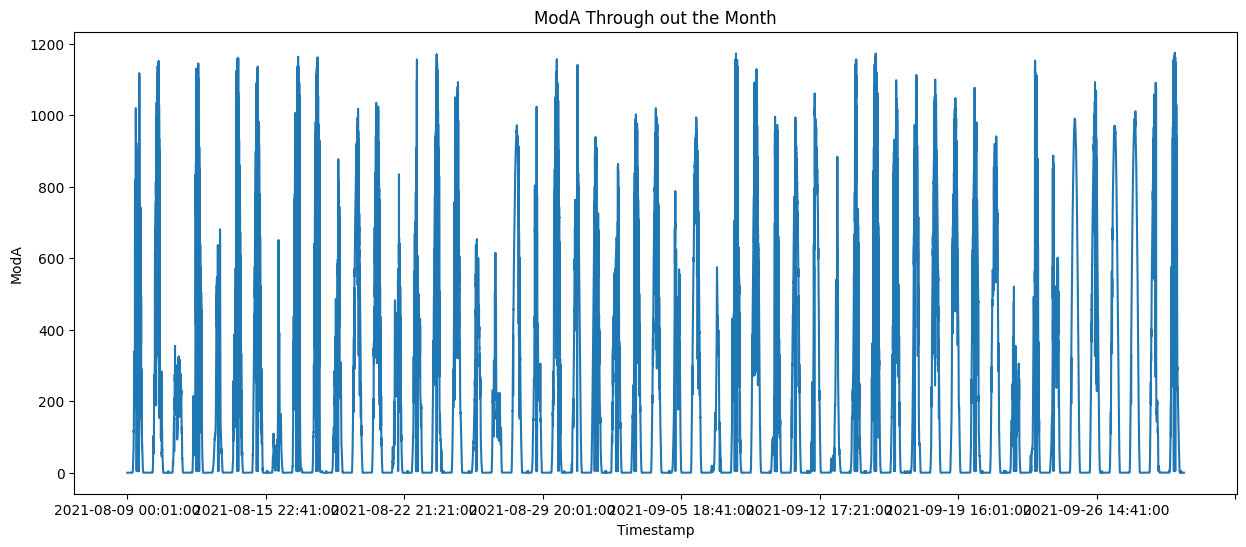

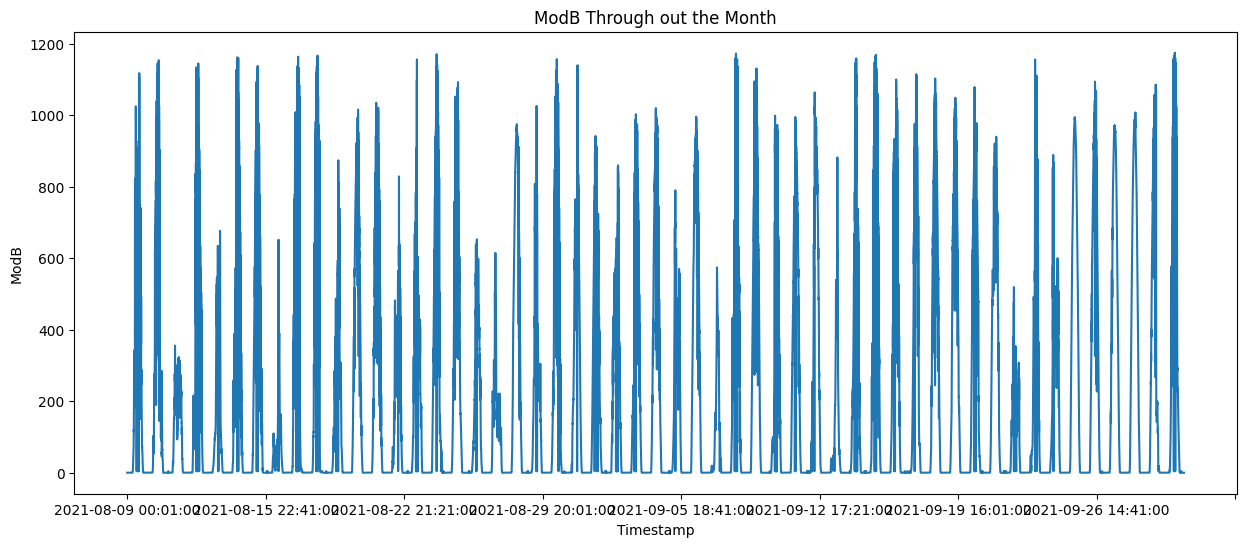

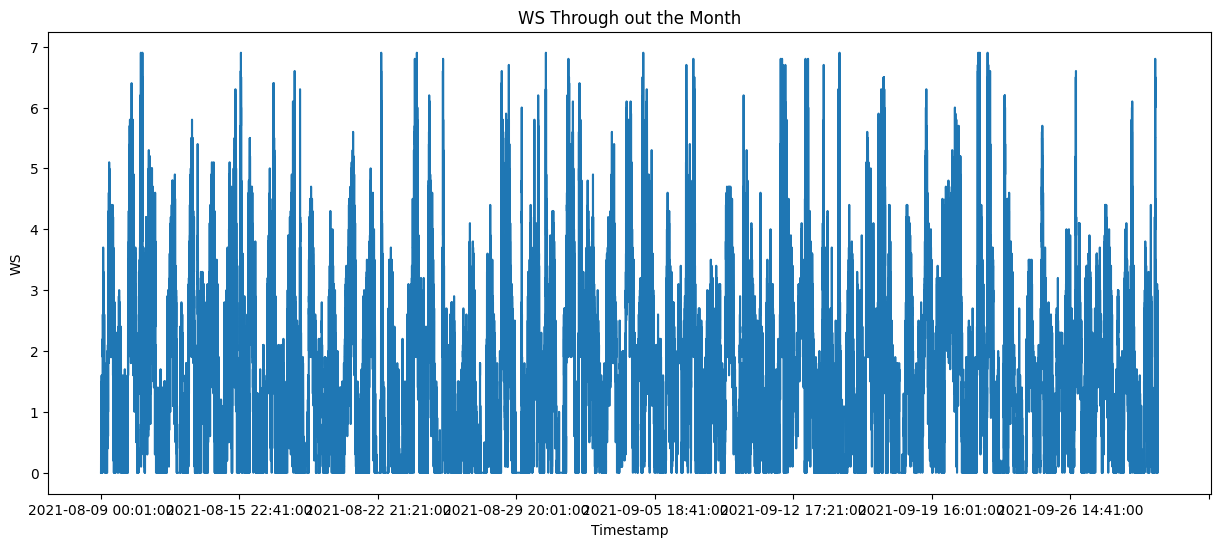

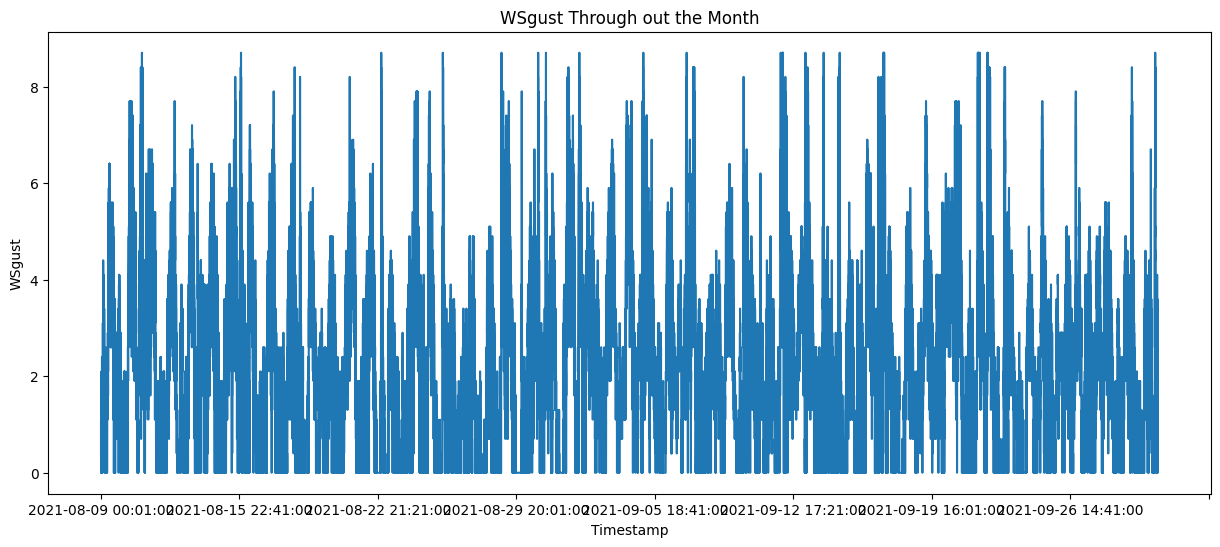

In [24]:

#ploting the one month period
for col in columns_to_plot:
    df_clean[col].loc['2021-08-09':'2021-09-9'].plot(kind="line", xlabel="Timestamp", ylabel=col, title= col + " Through out the Month" , figsize=(15, 6))
    plt.show()

We can see the pattern of these features over a month ... Let's see variation in a day which hours is peak

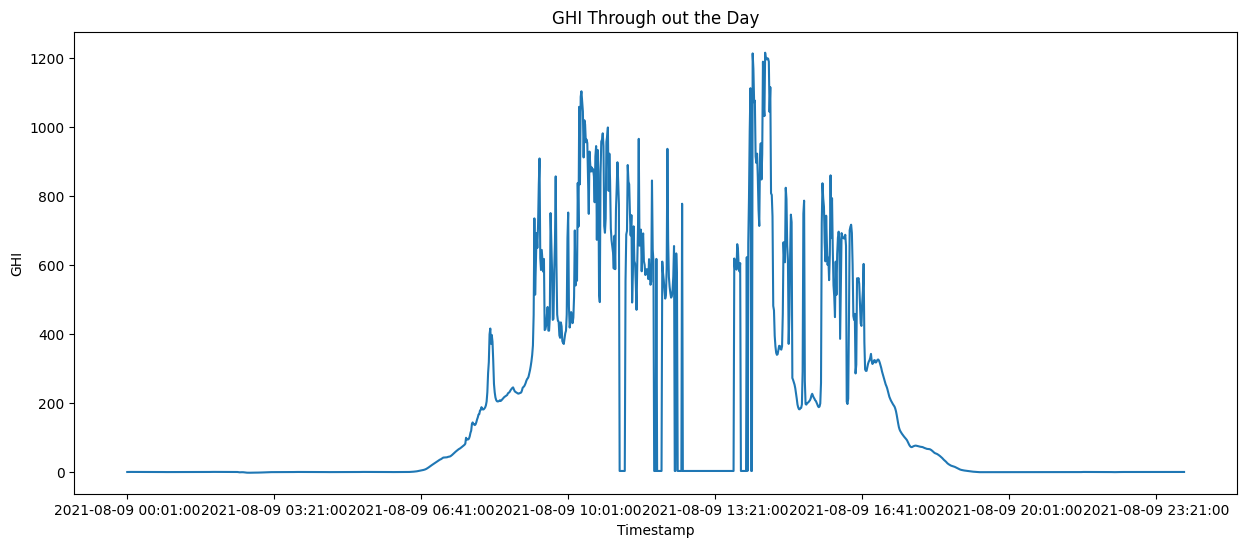

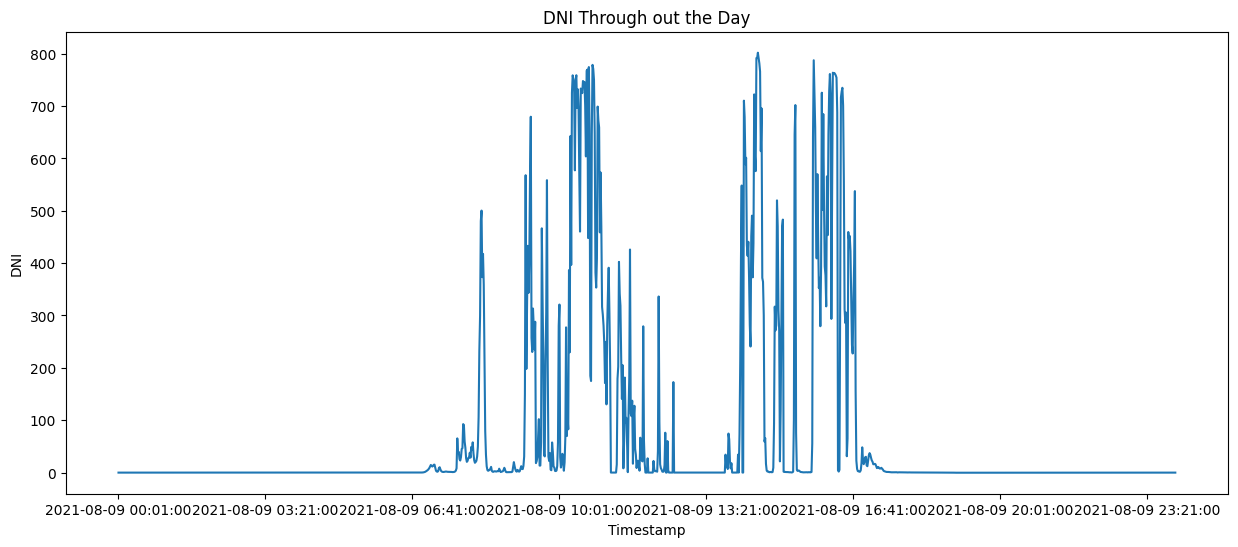

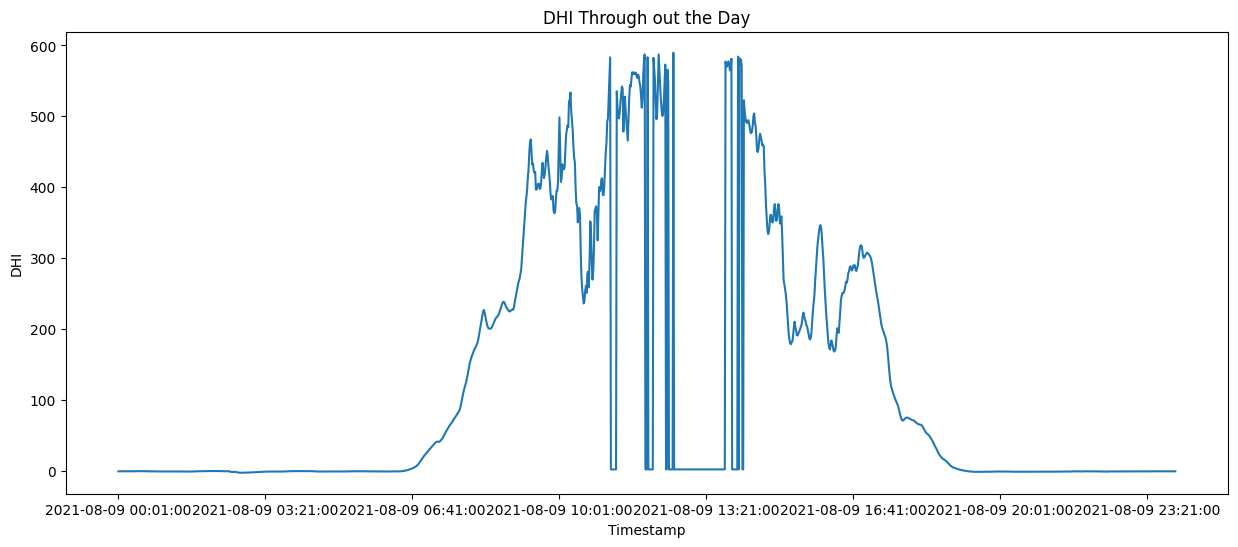

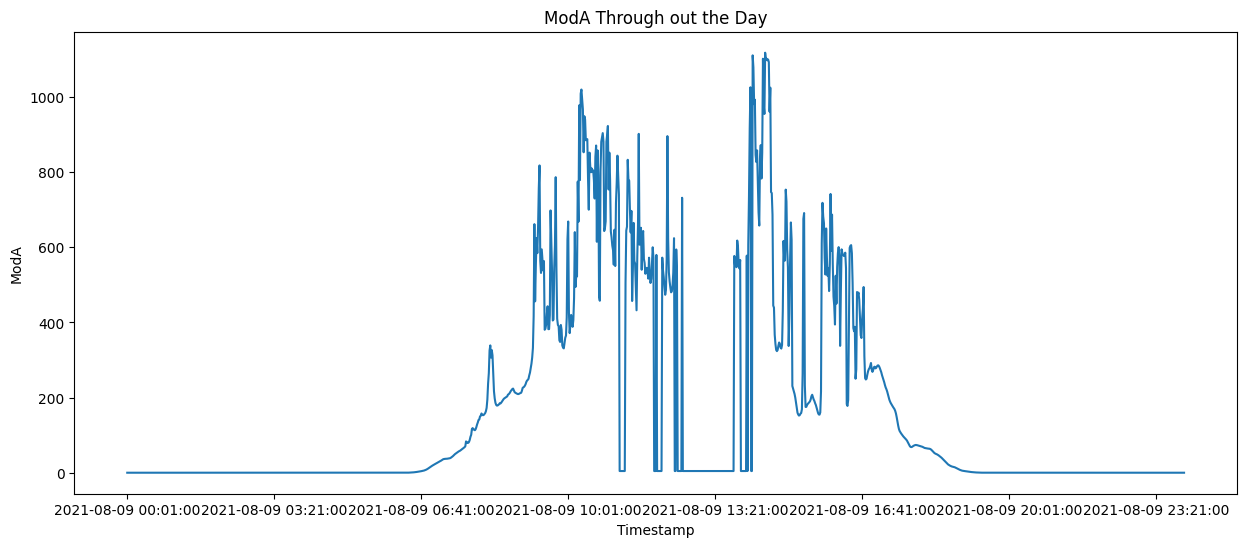

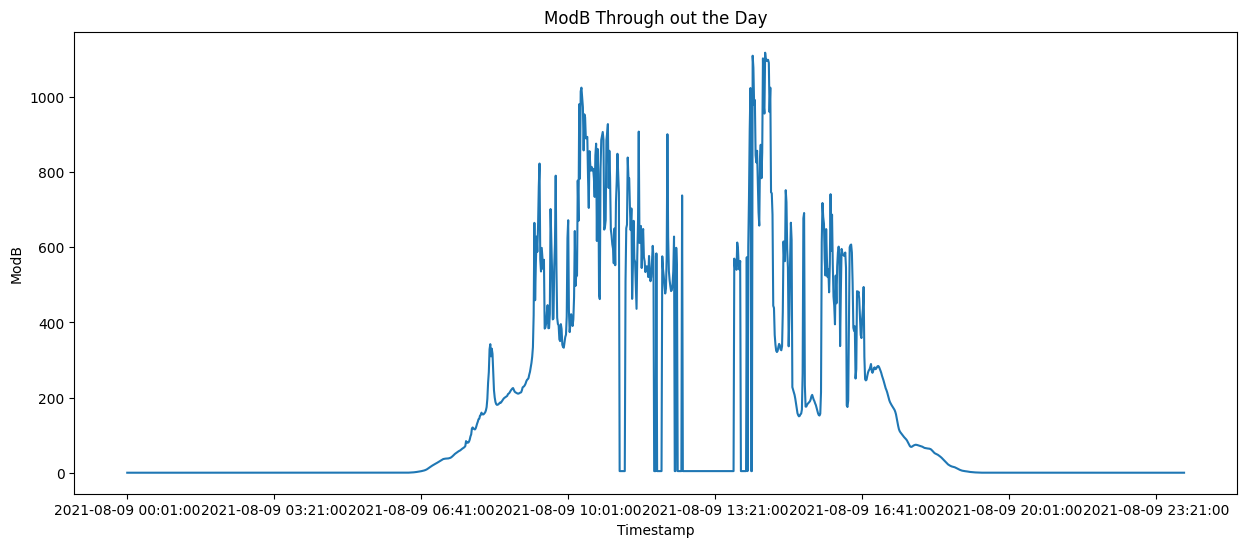

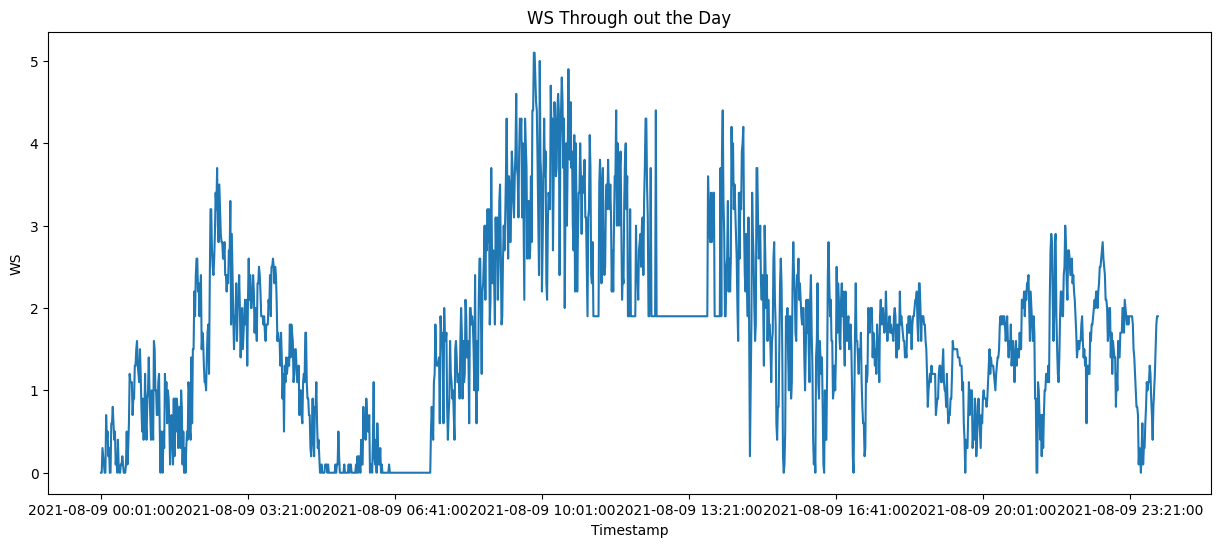

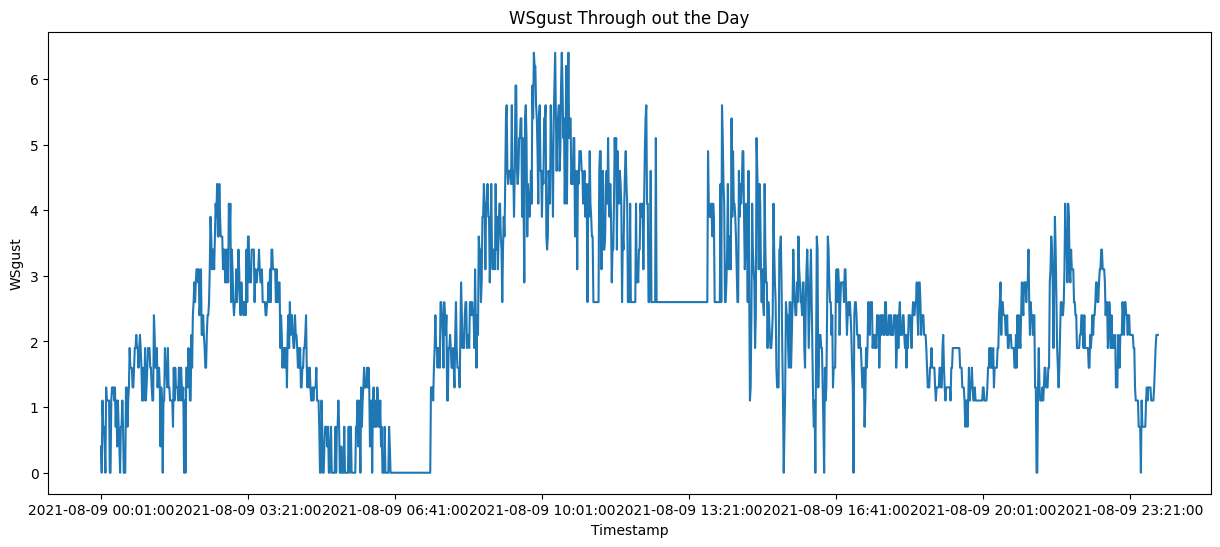

In [25]:
#ploting in a day data trend
for col in columns_to_plot:
    df_clean[col].loc['2021-08-09':'2021-08-10'].plot(kind="line", xlabel="Timestamp", ylabel=col, title= col + " Through out the Day" , figsize=(15, 6))
    plt.show()

## **Cleaning Impact**

Text(0.5, 1.0, 'Module Output Before vs After Cleaning')

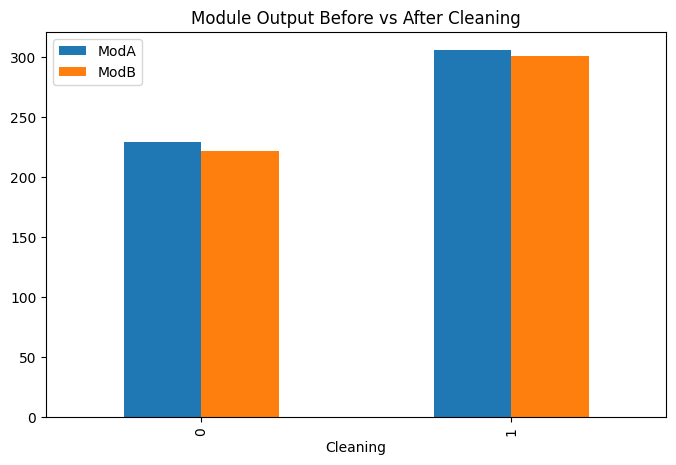

In [26]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(8, 5))
plt.title("Module Output Before vs After Cleaning")

 This show how solar panel cleaning affects the sensor readings ... we can see when cleaned we have high measurement

# **Correlation & Relationship Analysis**

<Axes: >

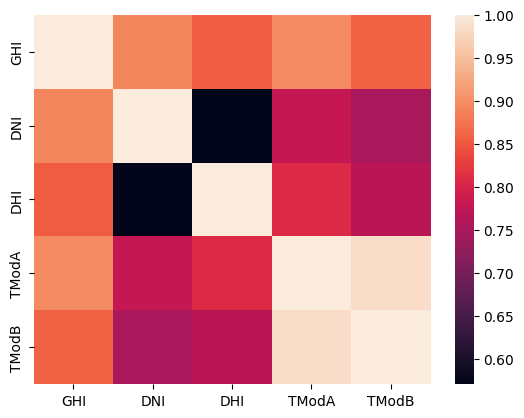

In [27]:
#Heatmap of correlations
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df_clean[corr_cols].corr())

This heatmap show us the correlations between features for example we can see postive relation between Temprature measurement and the solar radiation

<Axes: xlabel='TModA', ylabel='GHI'>

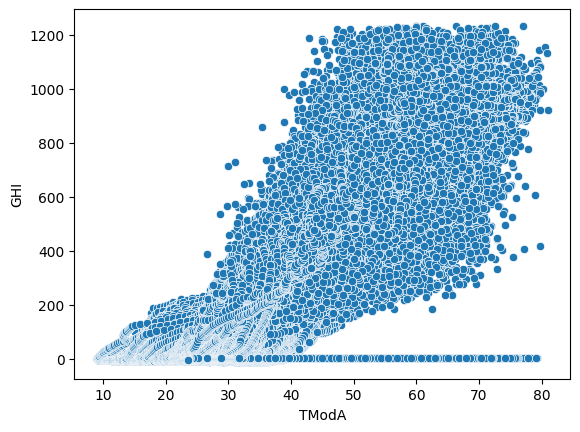

In [28]:
sns.scatterplot(x='TModA', y='GHI', data=df_clean)

<Axes: xlabel='DNI', ylabel='GHI'>

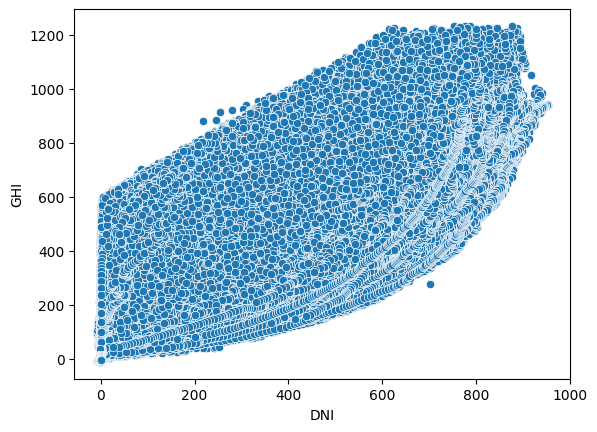

In [29]:
sns.scatterplot(x='DNI', y='GHI', data=df_clean)

<Axes: xlabel='RH', ylabel='Tamb'>

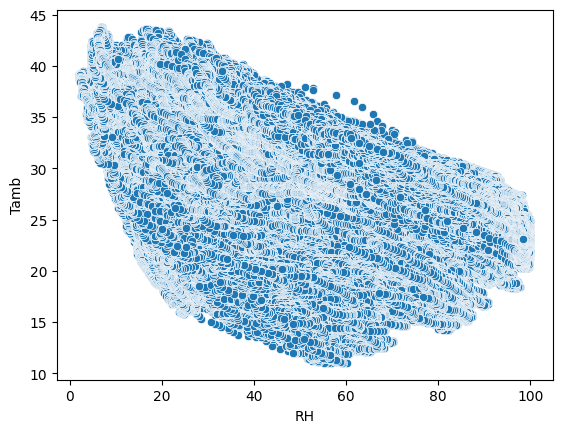

In [30]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)

This show us the linear relationship between features

## **Wind & Distribution Analysis**

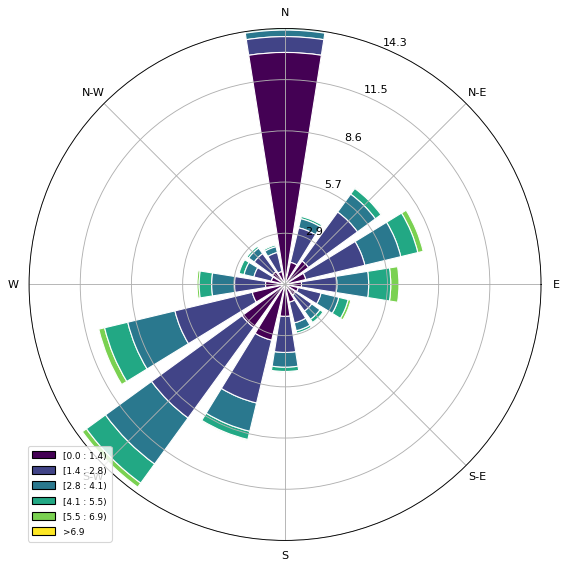

In [31]:
ax = WindroseAxes.from_ax()
ax.bar( df_clean["WD"] , df_clean["WS"] , normed=True , edgecolor="white")
ax.set_legend()

This show us in which direction the wind is high or low

Text(0.5, 1.0, 'Total solar radiation received per square meter on a horizontal surface Distribution')

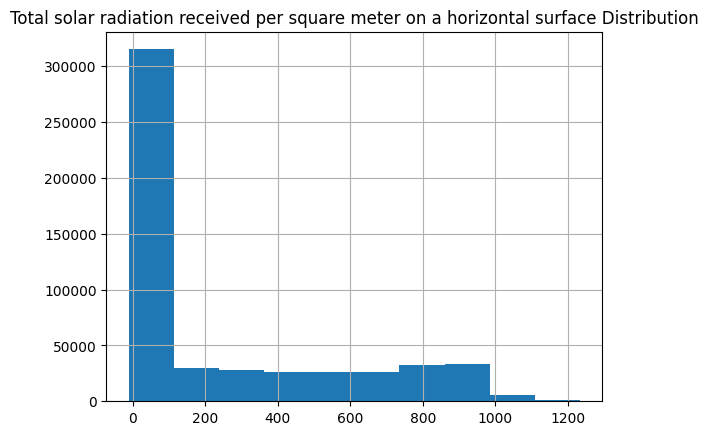

In [32]:
df_clean["GHI"].hist()
plt.title("Total solar radiation received per square meter on a horizontal surface Distribution")

Text(0.5, 1.0, 'Wind Speed Distribution')

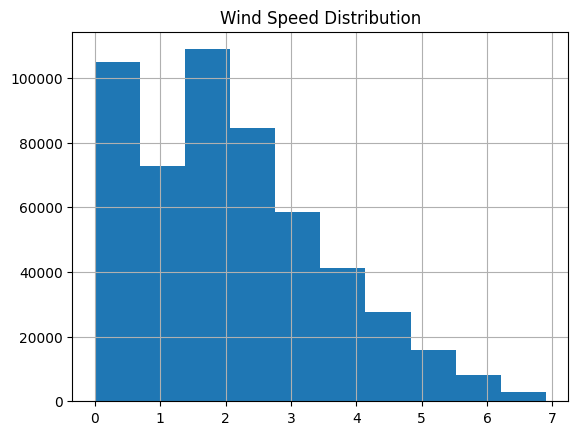

In [33]:
df_clean["WS"].hist()
plt.title("Wind Speed Distribution")

## **Temperature Analysis**

In [34]:
df_clean["RH"].corr(df_clean["TModA"]).round(2)

np.float64(-0.34)

<Axes: xlabel='RH', ylabel='TModA'>

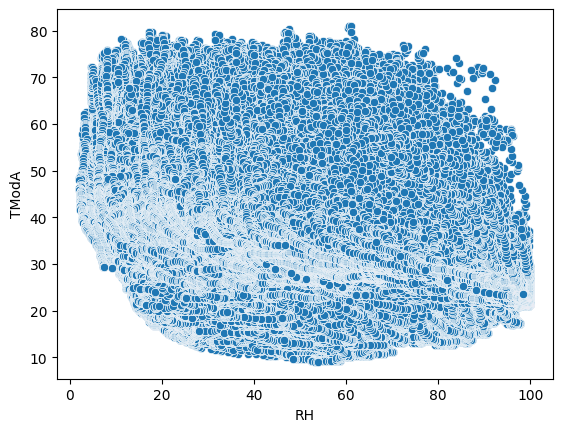

In [35]:
sns.scatterplot(x="RH" , y="TModA"  , data=df_clean)

In [36]:
df_clean["RH"].corr(df_clean["GHI"]).round(2)

np.float64(-0.35)

<Axes: xlabel='RH', ylabel='GHI'>

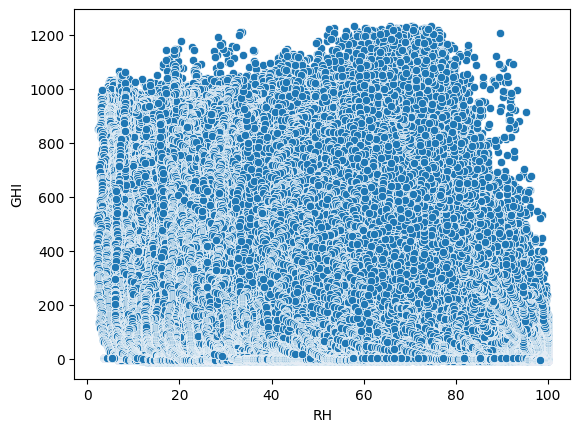

In [37]:
sns.scatterplot(x="RH" , y="GHI"  , data=df_clean)

We have seen the relation between temprature and solar radation over head ,and solar radation over horizon and over head which is for both case -0.35 which week corelation

## Bubble Chart

Text(0, 0.5, 'Ambient Temperature (Tamb)')

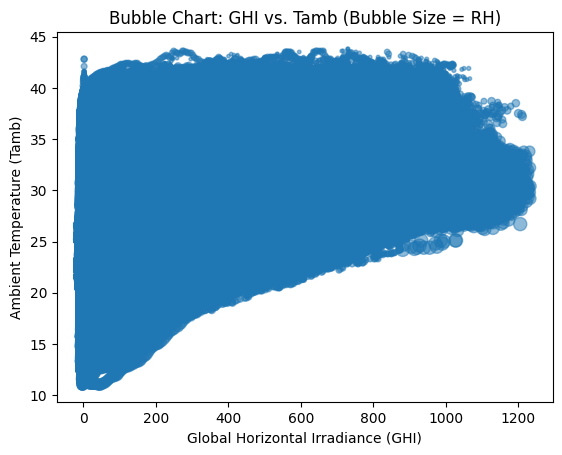

In [39]:

plt.scatter(x="GHI" , y="Tamb" , alpha=0.5 , s="RH", data=df_clean)
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (Tamb)")

This show how GHI and temperature vary together and humidity clusters in specific regions